In [4]:
#include("math405.jl")
using Plots

# Verlet Method

**Verlet integration** is a numerical method used to integrate Newton's equations of motion, which is frequently used to calculate trajectories of particles.

### Basic Stormer-Verlet:

$$x^{\cdot \cdot}=A(x(t)), \quad x(t_0)=x_0, x^{\cdot}=v_0$$
Then we can evaluate $x_n=x(t_n)$ at $t_n=t_0+n \Delta t$ ($\Delta t>0$)

step1: set $$x_1=x_0+v_0\Delta t +\frac{1}{2}A(x_0)\Delta t^2$$
step2: for $n=1,2,\dots$: $$x_{n+1}=2x_n-x_{n-1}+A(x_n)\Delta t^2$$

#### Verlet integration (without velocity)

Euler's method uses the forward difference approximation to the first derivative in differential equations of order one, Verlet intergration can be seen as using the central difference approximation to the second derivative:
$$\frac{\Delta ^2 x_n}{\Delta t^2}=\frac{\frac{x_{n+1}-x_n}{\Delta t}-\frac{x_n-x_{n-1}}{\Delta t}}{\Delta t}=\frac{x_{n+1}-2x_n+x_{n-1}}{\Delta t^2}=a_n=A(x_n)$$
$$\implies x_{n+1}=2x_n-x_{n-1}+a_n\Delta t^2 \quad \textrm{where } a_n=A(x_n)$$

### Velocity Verlet

A related, and more commonly used, algorithm is the **velocity Verlet** algorithm. It explicitly incorporates velocity, solving the problem of the first time step in the basic Verlet algorithm:
$$x(t+\Delta t)=x(t)+v(t)\Delta t+\frac{1}{2}a(t)\Delta t^2$$
$$v(t+\Delta t)=v(t)+\frac{a(t)+a(t+\Delta t)}{2}\Delta t$$

The standard implementation scheme is :

step1: $$v(t+\frac{1}{2}\Delta t)=v(t)+\frac{1}{2}a(t)\Delta t$$

step2: $$x(t+\Delta t)=x(t)+v(t+\frac{1}{2}\Delta t)\Delta t$$

step3: Derive $a(t+\Delta t)$ from the interaction potential using $x(t+\Delta t)$

step4: $$v(t+\Delta t)=v(t+\frac{1}{2}\Delta t)+\frac{1}{2}a(t+\Delta t)\Delta t$$

Eliminating the half-step velocity, it can be shortened to:

step1: $$x(t+\Delta t)=x(t)+v(t)\Delta t+\frac{1}{2}a(t)\Delta t^2$$

step2: Derive $a(t+\Delta t)$ from the interaction potential using $x(t+\Delta t)$

step3: $$v(t+\Delta t)=v(t)+\frac{1}{2} \Big(a(t)+a(t+\Delta t)\Big)\Delta t$$

However, it assumes that acceleration $a(t+\Delta t)$ only depends on position $x(t+\Delta t)$ and does not depend on velocity $v(t+\Delta t)$

### Energy conservation of the velocity-verlet method using the simple harmonic oscillator
For a simple harmonic oscillator in a closed system the energy is conserved.
$$
\frac{d^2x}{dt^2} = -kx    
$$
The energy of the oscillator can be calculated using the formula $E = \frac{p^2}{2m} + \frac{kx^2}{2}$.

If we set the mass and the spring constant to 1 $k = 1, m=1$.

Then the total energy of the oscillator can be written as $E = \frac{p^2}{2} + \frac{x^2}{2}$.

Therefore, a plot of p vs x will produce a graph of radius $\sqrt{2E}$.

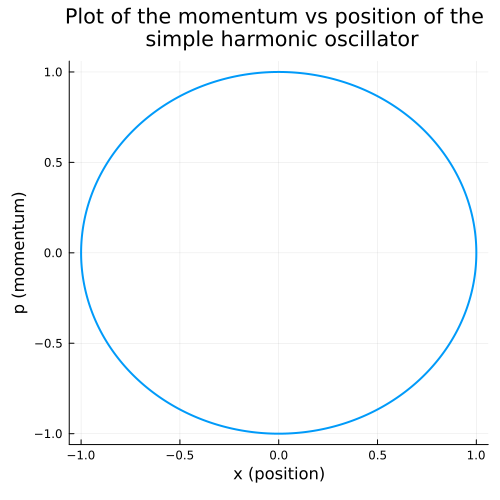

In [5]:
##Defining Variables
m = 1.0
k = 1.0
N = 1000
x0 = 1.0
v0 = 0.0
tf= 10.0
h = 1/N
t = 0.0:h:tf
x = zeros(length(t))
v = zeros(length(t))
function f(x)
    -k*x
end
x[1] = x0
v[1] = v0

#Loop which iterates the velocity verlet algorithm
for n = 2:length(t)
    x_half = x[n-1] + 0.5*h*v[n-1]
    v[n] = v[n-1]+h*f(x_half)
    x[n] = x_half + 0.5*h*v[n]
end

#Plot of p vs x
plot(x,v,lw=2, c=1, label = "", size = (500, 500), title = "Plot of the momentum vs position of the \n simple harmonic oscillator",
xlabel = "x (position)", ylabel = "p (momentum)")

## Error of the velocity Verlet
The velocity verlet algorithm has a local error of $O(h^4)$ and a global error of $O(h^2)$. In molecular dynamics the global error is more important than the local error, therefore this method is called a second order method. This makes this more accurate than the symplectic Euler.
                                                        
                                                                   Verlet
|Quantity|Local Error|Global Error|
|:--|:--|:--|
|$x(t)$|$O(h^4)$|$O(h^2)$|
|$v(t)$|$O(h^2)$|$O(h^2)$|


                                                               Symplectic Euler     
|Quantity|Local Error|Global Error|
|:--|:--|:--|
|$x(t)$|$O(h^2)$|$O(h)$|
|$v(t)$|$O(h^2)$|$O(h)$|

# Wave Equation
$$\frac{\partial^2u}{\partial t^2} = c^2\nabla^2u$$
# Numerical
$$A(u_{i,j}) = c^2\left(\frac{u_{i+1,j} + u_{i-1,j} - 2 u_{i,j}}{h^2} + \frac{u_{i,j+1} + u_{i,j-1} - 2 u_{i,j}}{h^2} \right) $$

In [4]:
using Plots

h = 0.1
x = -5:h:5
y = -5:h:5

f = (x, y) -> exp.(-x.^2) * exp.(-y.^2)'
u_vals = f(x, y)

function ThreeForce(ulist::Matrix{Float64})
    f = zeros(size(ulist))
    for (i, j) in Iterators.product(2:size(ulist)[1]-1, 2:size(ulist)[2]-1)
        f[i, j] += (ulist[i-1, j] + ulist[i+1, j] - 2 * ulist[i, j]) / h^2
        f[i, j] += (ulist[i, j-1] + ulist[i, j+1] - 2 * ulist[i, j]) / h^2
    end
    return 0.01 * f
end

u_old = u_vals
u_n   = u_old .+ 0.5 .* ThreeForce(u_old) .* h^2
"SETUP"

"SETUP"

┌ Info: Saved animation to /home/alex/Documents/assigns/Verlet/imgs/Surfacewave.gif
└ @ Plots /home/alex/.julia/packages/Plots/gzYVM/src/animation.jl:149


Plots.AnimatedGif("/home/alex/Documents/assigns/Verlet/imgs/Surfacewave.gif")
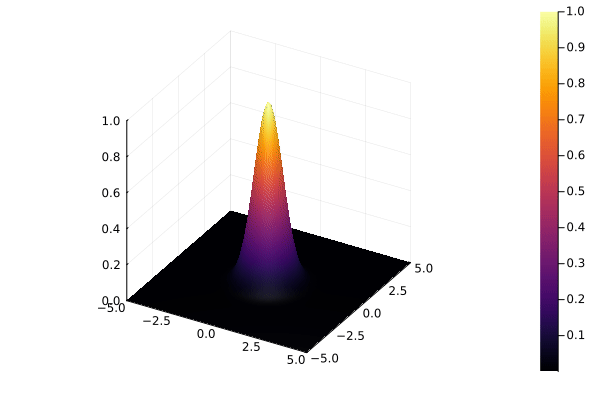

In [5]:
frames = [surface(x, y, u_old, zlims=(0,1)), surface(x, y, u_n, zlims=(0,1))]
for i in 1:2000
    u_next = 2 .* u_n .- u_old .+ ThreeForce(u_n) .* h^2
    u_old = u_n
    u_n = u_next
    if mod(i, 5) == 0
        plti = surface(x, y, u_n, zlims=(0,1))
        push!(frames, plti)
    end
end
anim = @animate for f in frames
        surface(f)
end
gif(anim, "imgs/Surfacewave.gif", fps=30)

### NVE molecular dynamics

In [8]:
include("Particle.jl")
using LaTeXStrings

#-------- Particle(Position, Mass)
sun     = Particle([0, 0],     1)
earth   = Particle([0, 1],     3e-6)
jupiter = Particle([0, 5.36],  9.55e-4)
halley  = Particle([34.75, 0], 1e-14)

planets = [sun, earth, jupiter, halley]
planet_names = ["Sun", "Earth", "Jupiter", "Halley's comet"]   

# Verlet Setup
v0 = [[0,0], [-1, 0], [-0.425,0], [0,0.0296]]
x_old = [p.position for p in planets]
x_n = x_old .+ v0 .* δt + accels(planets) .* 0.5 .* δt^2


display(L"$\vec{x_0} = \text{initial conditions}\\
           \vec{x_1} = \vec{x_0} + \vec{v_0} \delta t + \frac{1}{2}\vec{A}(x) \delta t^{2}$")
display(L"\vec{A}(x_i) = \sum_{j\neq i}{G\frac{m_j}{\vec{r_{ij}}^2}}")

L"$\vec{x_0} = \text{initial conditions}\\
           \vec{x_1} = \vec{x_0} + \vec{v_0} \delta t + \frac{1}{2}\vec{A}(x) \delta t^{2}$"

L"$\vec{A}(x_i) = \sum_{j\neq i}{G\frac{m_j}{\vec{r_{ij}}^2}}$"

L"$x_{n+1} = 2 x_n - x_{n-1} + A(x) \delta t^2$"

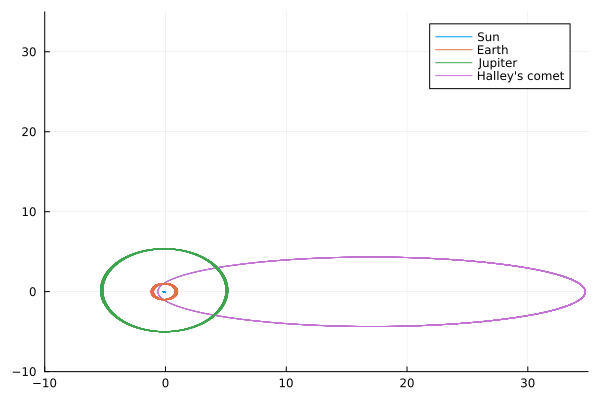

In [10]:
δt = 0.015
t_end=468

update_particles(planets, x_n)
for i in δt:δt:t_end
    x_next = 2 .* x_n .- x_old .+ accels(planets) .* δt^2
    x_old = x_n
    x_n = x_next
    update_particles(planets, x_n)
end

display(L"$x_{n+1} = 2 x_n - x_{n-1} + A(x) \delta t^2$")
display("image/png", read("imgs/orbits.png"))
    

# NVE Molecular Dynamics Simulations
(also known as a microcanonical ensemble) 

where
* N - Number/moles of each type of atom is fixed
* V - Volume simulated is fixed
* E - (total) Energy of system is fixed 

Often classical mechanics utilized for nuclei $\rightarrow$ allows Verlet method directly for trajectories 

(The Born-Oppenheimer approximation is often used for electronic structure $\rightarrow$ machine learning techniques might be used as well in more modern approaches [paper](https://arxiv.org/pdf/2001.11696.pdf))

Similar to the gravitational example, but use electrostatic and electromagnetic potentials instead 

for example the Lennard-Jones Potential

$$U(r) = 4\varepsilon \left[\left(\frac{\sigma}{r}\right)^{12}- \left(\frac{\sigma}{r}\right)^6\right]$$

where 
$\varepsilon$ is the depth of the potential well
$\sigma$ is the distance at which the particle-particle energy is zero
$r$ is the distance between the particles

$$F(x) = -\nabla U(r) = 24\varepsilon \left[\frac{\sigma^5}{r^7} - 2\frac{\sigma^{11}}{r^{13}} \right]$$

Usually only for pair potential $\rightarrow$ need more complex potential for many systems

$1/r^{12} \rightarrow$ describes Pauli repulsion   $1/r^{6}\rightarrow$  describes the attraction/Van der Waals

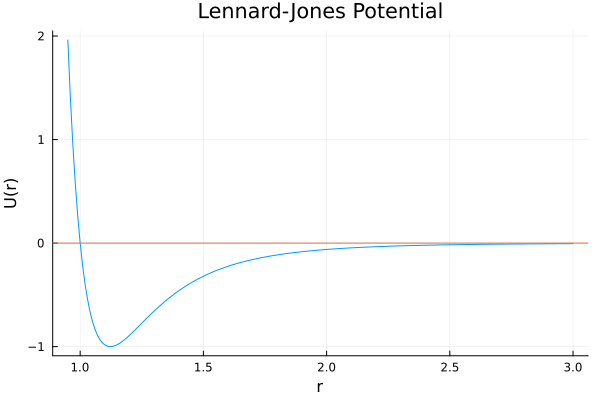

In [11]:
x=0.95:0.01:3
LJP = r -> 4 * ((1/r)^12-(1/r)^6)
plot(x, LJP.(x), title="Lennard-Jones Potential", legend=false, xlabel="r", ylabel="U(r)")
hline!([0])


In [153]:
function LJForce(a::Particle, b::Particle; ε=1, σ=1)
    r = b.position .- a.position
    rnorm = norm(r, 2)
    24*ε*(σ^5/rnorm^7 - 2*σ^11/rnorm^13) * (r/rnorm)
end

function LJAccels(plist::Vector{Particle})
    a = [zeros(size(p.position)) for p in plist]
    for i in 1:length(plist)-1
       for j in i+1:length(plist)
            f = LJForce(plist[i], plist[j])
            a[i] += f
            a[j] -= f
        end
    end
    return a
end

LJAccels (generic function with 1 method)

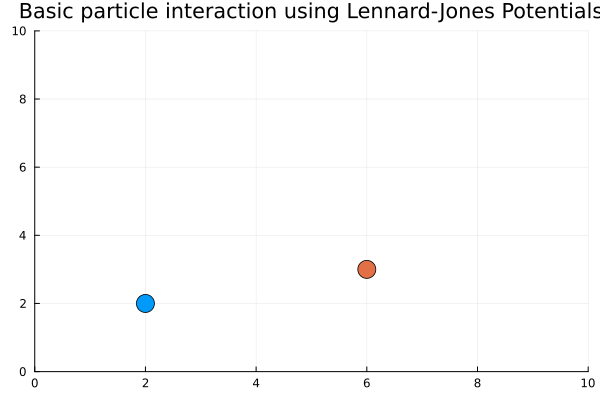

In [155]:
p1 = Particle([2, 2], 1)
p2 = Particle([6, 3], 1)
particles = [p1, p2]
Δt = 0.01
t_end =2
v_n = [[2, 4], [-2, 2]]
x_n  = [p1.position, p2.position]
for i in 0:Δt:t_end
    A_n    = LJAccels(particles)
    x_next    = x_n .+ v_n .* Δt .+ 0.5* A_n * Δt^2  # VELOCITY VERLET
    update_particles(particles, x_next)
    A_next = LJAccels(particles)
    v_next = v_n .+ 0.5 * (A_n + A_next) * Δt
    x_n = x_next; v_n = v_next; A_n = A_next
end

display("image/gif", read("imgs/two_body.gif"))

In [137]:
# anim = @animate for pos ∈ a_positions
#     plot(xlims=(0,10), ylims=(0, 10), legend=false, title="Basic particle interaction using Lennard-Jones Potentials")
#     scatter!([pos[1][1]], [pos[1][2]], color=1, markersize=10)
#     scatter!([pos[2][1]], [pos[2][2]], color=2, markersize=10)
# end


# gif(anim, "two_body.gif", fps = 30)

## Techniques to reduce the computational complexity of the A(x) term of Verlet
The simple naïve approach to go through every permutation of pairs and compute net force $\rightarrow O(n^2)$
<center><img src="imgs/compare.gif"></img><center>

## Using Newton's Third Law to cut the computations in half

$$F_{ij} = -F_{ji}$$
<small>
<pre>
<b>Without Newton 3rd law</b>
for i in 1:length(particles)
    for j in 1:length(particles)
        f = force(particles[i], particles[j])
        A[i] += f
    end
end

<b>With Newton 3rd law</b>
for i in 1:length(particles)-1
    for j in i+1:length(particles)
        f = force(particles[i], particles[j])
        A[i] += f
        A[j] -= f
    end
end
</pre>
</small>



## Using cuttoff radius and Linked Cell method 

Since the Lennard-Jones potential and many other molecular potentials drop off rapidly with distance($1/r^6$) the effects of particles far away are negligable so we can set a cuttoff radius so to only consider nearby particles for the $A(x)$ terms

$$
F(r_{ij}) = \left\{ \begin{array}{ll}
      24 \varepsilon \left[\frac{\sigma^5}{r_{ij}^7} - 2\frac{\sigma^{11}}{r_{ij}^{13}} \right] & r_{ij} \leq r_{cut} \\
      0 & r_{ij} > r_{cut} \\
\end{array} 
\right.
$$

By using the linked cell method we can reduce the complexity to about $O(n)$ for most cases instead of the previous $O(n^2)$.

## How the linked cell method works
For the given domain $\Omega = [0, L_1]\times[0, L_2]$ split into equally spaced subdomains $\Omega_{(i,j)}$
<div>
<center><img src="imgs/Cell_list.gif" width="1000"></img></center>
<div>

## Alternative Methods for Molecular dynamics

Verlet method used here uses fixed time step length, but there are methods such as the impulse or r-Respa method (similar to verlet) that can adapt time step size

## Contraints to increase stability
There are also methods to constrain/freeze high frequency modes such as the SHAKE or RATTLE method that allow for larger time step in our integration